# 实验1 玻尔振动的物理研究
> Copyright(c) 2022 GeorgeDong32. All Rights Reserved.

In [236]:
from cProfile import label
import scipy.constants as cst
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# plt防止中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 测量摆轮摆幅$\theta$与固有周期$T_0$的关系
数据见theta-T0.csv

### 阻尼系数$\beta$的计算

#### 阻尼挡位1

In [237]:
T1 = 1.5640
data1 = pd.read_csv("cbeta1.csv")
th11 = data1.iloc[:,0]
th12 = data1.iloc[:,1]
ln1 = np.log(th11 / th12)
avaln1 = np.mean(ln1)
beta1 = avaln1 / (th11.count() * T1)
print(ln1)
print("ln平均值=",avaln1)
print("beta1=", beta1)

0    0.502092
1    0.507595
2    0.517943
3    0.510826
dtype: float64
ln平均值= 0.5096138155706564
beta1= 0.08146000888277756


#### 阻尼挡位2

In [238]:
T2 = 1.5693
data2 = pd.read_csv("cbeta2.csv")
th21 = data2.iloc[:,0]
th22 = data2.iloc[:,1]
ln2 = np.log(th21 / th22)
avaln2 = np.mean(ln2)
beta2 = avaln2 / (th21.count() * T2)
print(ln2)
print("ln平均值=",avaln2)
print("beta2=", beta2)

0    0.478999
1    0.473288
2    0.475424
3    0.471986
4    0.461346
dtype: float64
ln平均值= 0.47220839005373233
beta2= 0.06018076722790191


#### 阻尼挡位3

In [239]:
T3 = 1.5615
data3 = pd.read_csv("cbeta3.csv")
th31 = data3.iloc[:,0]
th32 = data3.iloc[:,1]
ln3 = np.log(th31 / th32)
avaln3 = np.mean(ln3)
beta3 = avaln3 / (th31.count() * T3)
print(ln3)
print("ln平均值=",avaln3)
print("beta3=", beta3)

0    0.515813
1    0.510826
2    0.501693
3    0.490623
4    0.499652
dtype: float64
ln平均值= 0.5037214337724151
beta3= 0.06451763480914698


### 幅频/相频特性测量

0     1.015215
1     1.008146
2     1.001992
3     0.995906
4     0.990844
5     0.986222
6     0.978567
7     0.976196
8     0.971099
9     0.966436
10    0.961113
11    0.953382
12    0.950920
dtype: float64
0     0.789270
1     0.843172
2     0.742022
3     0.688960
4     0.459196
5     0.299718
6     0.168732
7     0.127376
8     0.086779
9     0.057803
10    0.040089
11    0.028455
12    0.019530
dtype: float64


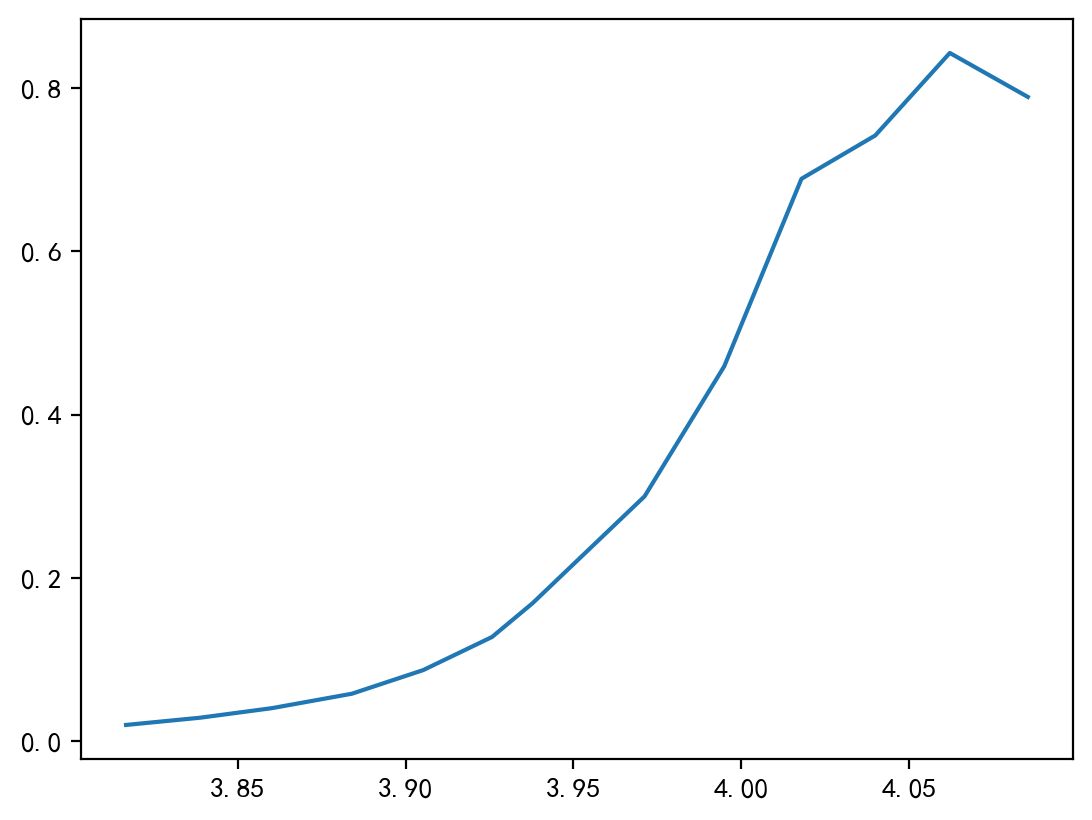

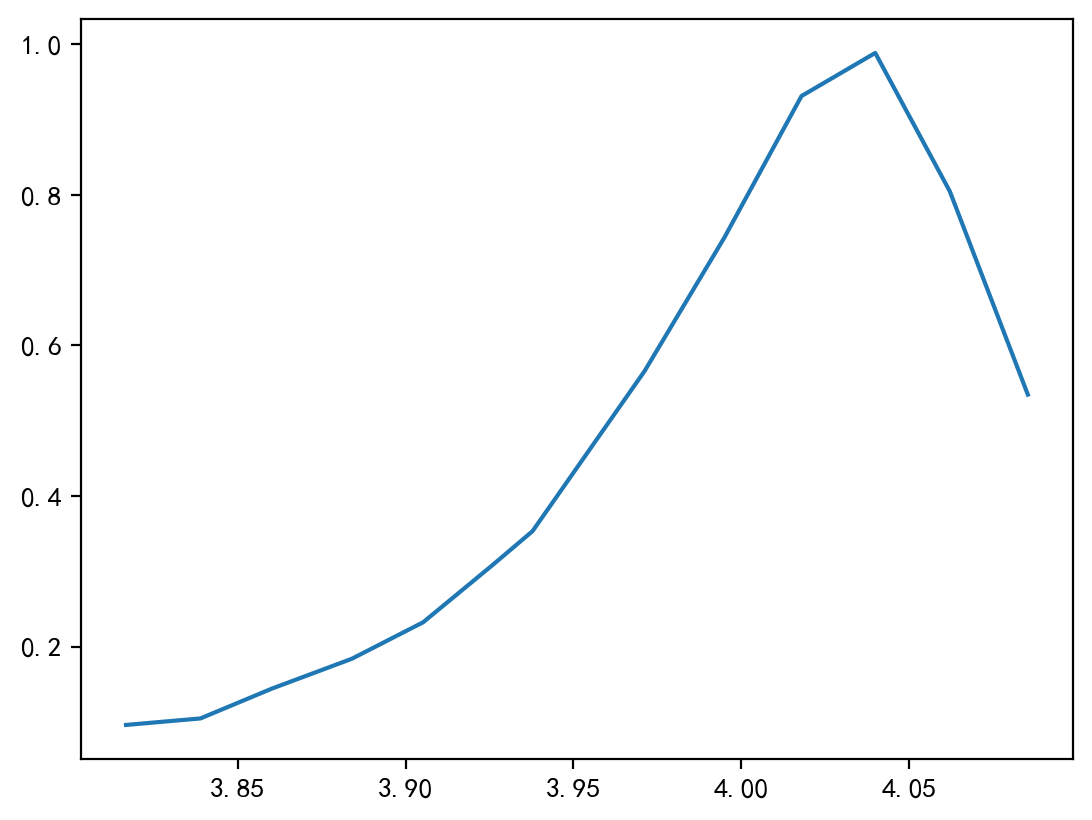

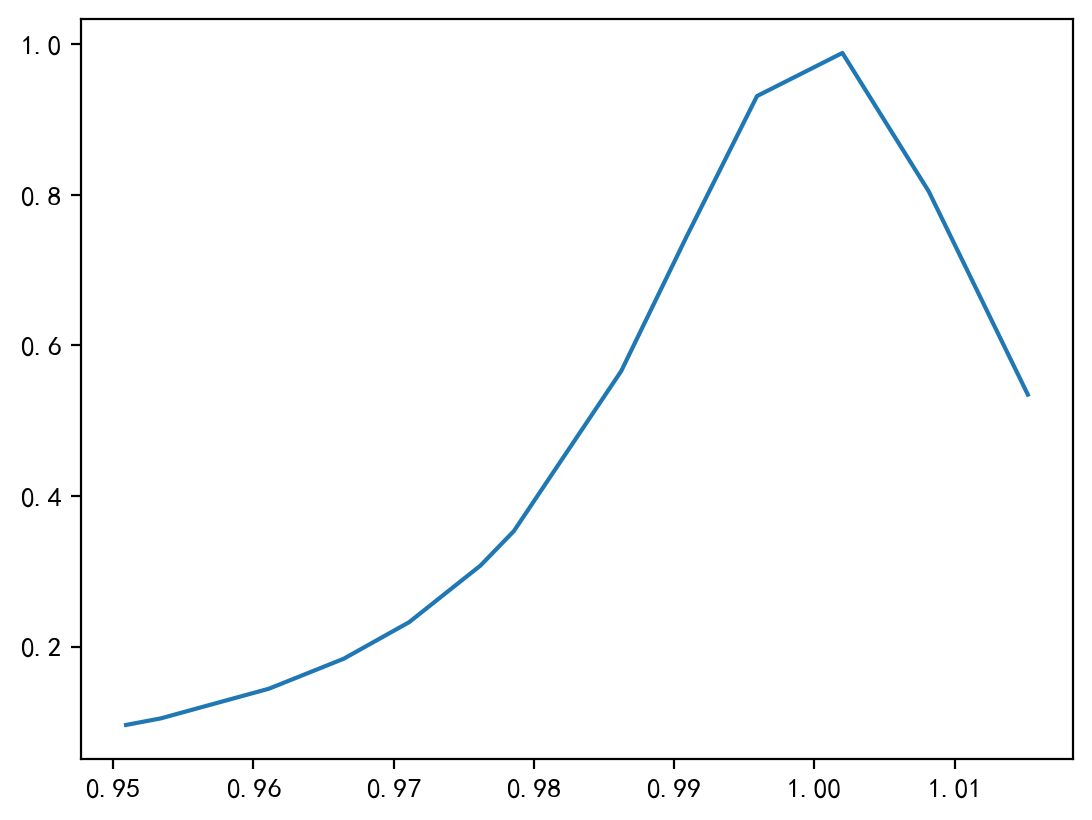

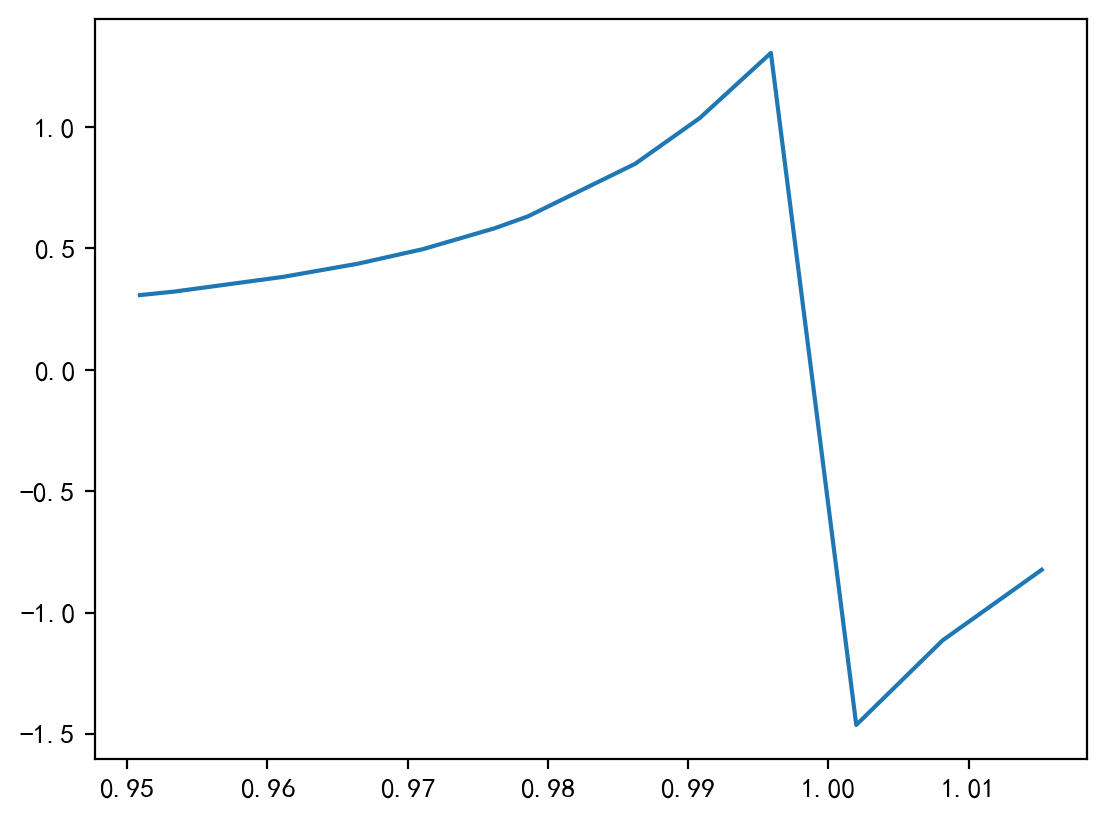

In [240]:
def wr(w0,beta):
    return np.sqrt(w0*w0 - 2*beta*beta)

def thetar(m,w_r,beta):
    return m / (2*beta*w_r)

def phi_c(beta,T,T0):
    return np.arctan((beta*T0*T0*T)/(np.pi*((T*T) - (T0*T0))))

def thetae(w,w0,beta):
    return beta**2 / ((w-w0)**2 + beta**2)

E3data = pd.read_csv("3data.csv")
m = E3data.iloc[:,0]
TL = E3data.iloc[:,1]
theta = E3data.iloc[:,3]
T0 = E3data.iloc[:,4]
phi = E3data.iloc[:,5]
omega = 2*np.pi / TL
omega0 = 2*np.pi / T0
omegar = wr(omega0,beta3)
theta_r = thetar(m,omegar,beta3) * (180/np.pi)
d1 = omega / omegar
d2 = (theta / theta_r)**2
d3 = phi_c(beta3,TL,T0)
print(d1)
print(d2*10)
plt.figure(dpi=200)
plt.plot(omega,d2*10)
plt.savefig(".\幅频特性曲线.png")
plt.figure(dpi=200)
plt.plot(omega,thetae(omega,omega0,beta3))
plt.savefig(".\理想幅频特性曲线.png")
plt.figure(dpi=200)
plt.plot(d1,thetae(omega,omega0,beta3))
plt.savefig(".\对照理想幅频特性曲线.png")
plt.figure(dpi=200)
plt.plot(d1,d3)
plt.savefig(".\相频特性曲线.png")

In [241]:
print(d3)

0    -0.823746
1    -1.114560
2    -1.462799
3     1.304685
4     1.037028
5     0.847925
6     0.631280
7     0.582432
8     0.496743
9     0.436475
10    0.382380
11    0.322007
12    0.307482
dtype: float64
